# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [12]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [13]:
train, test = keras.datasets.cifar10.load_data()

In [14]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [15]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [16]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [17]:
## 超參數設定
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [18]:
results = {}

keras.backend.clear_session() # 把舊的 Graph 清掉
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

#資料來源
#https://keras.io/zh/optimizers/

#SGD
#keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
#lr: float >= 0. 學習率。
#momentum: float >= 0. 動量，用於加速 SGD 在相關方向上前進，並抑制震盪。
#decay: float >= 0. 衰減值，每次參數更新後學習率衰減值。
#nesterov: boolean. 是否使用 Nesterov 動量。

#RMSprop
#keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
#lr: float >= 0. 學習率。
#rho: float >= 0. RMSProp梯度平方的移動均值的衰減率。
#epsilon: float >= 0. 模糊因子。若為 None，默認為 K.epsilon()。
#decay: float >= 0. 衰減值，每次參數更新後學習率衰減值。

#Adagrad
#keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
#lr: float >= 0. 學習率。
#epsilon: float >= 0. 模糊因子。若為 None，默認為 K.epsilon()。
#decay: float >= 0. 衰減值，每次參數更新後學習率衰減值。

#
#keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
#lr: float >= 0. 學習率，建議保留默認值。
#rho: float >= 0. Adadelta梯度平方的移動均值的衰減率。
#epsilon: float >= 0. 模糊因子。若為 None，默認為 K.epsilon()。
#decay: float >= 0. 衰減值，每次參數更新後學習率衰減值。

#
#keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#lr: float >= 0. 學習率。
#beta_1: float, 0 < beta < 1. 通常接近於1。
#beta_2: float, 0 < beta < 1. 通常接近於1。
#epsilon: float >= 0. 模糊因子。若為 None，默認為 K.epsilon()。
#decay: float >= 0. 衰減值，每次參數更新後學習率衰減值。
#amsgrad: boolean. 是否應用此算法的 AMSGrad 變種

#
#keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
#lr: float >= 0. 學習率。
#beta_1/beta_2: floats, 0 < beta < 1. 通常接近於1。
#epsilon: float >= 0. 模糊因子。若為 None，默認為 K.epsilon()。
#decay: float >= 0. 衰減值，每次參數更新後學習率衰減值。

#
#keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
#lr: float >= 0. 學習率。
#beta_1/beta_2: floats, 0 < beta < 1. 通常接近於1。
#epsilon: float >= 0. 模糊因子。若為 None，默認為 K.epsilon()。

optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 105u

Epoch 49/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.3948 - accuracy: 0.8585 - val_loss: 2.2058 - val_accuracy: 0.5284
Epoch 50/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.3727 - accuracy: 0.8667 - val_loss: 2.2450 - val_accuracy: 0.5214


In [24]:
# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

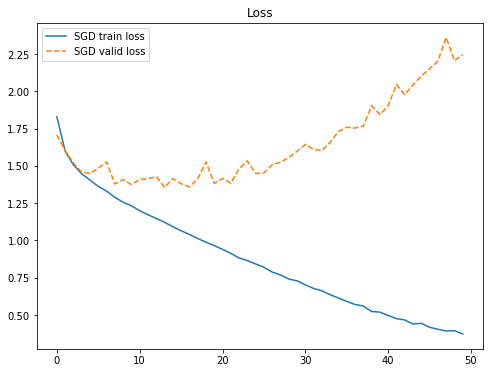

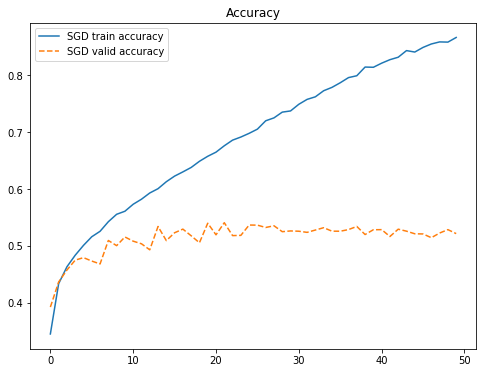

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
plt.plot(range(len(train_loss)),train_loss, '-', label="SGD train loss")
plt.plot(range(len(valid_loss)),valid_loss, '--', label="SGD valid loss")
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(range(len(train_acc)),train_acc, '-', label="SGD train accuracy")
plt.plot(range(len(valid_acc)),valid_acc, '--', label="SGD valid accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()